In [9]:
!pip install xgboost
!pip install imbalanced-learn
!pip install keras
!pip install tensorflow
!pip install scikeras


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense

from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier



data = pd.read_csv('Loan_default.csv')


In [12]:




label_enc = LabelEncoder()
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])


data['Income_to_LoanRatio'] = data['Income'] / data['LoanAmount']
data['CreditScore_to_Age'] = data['CreditScore'] / data['Age']
data['LoanTerm_in_Years'] = data['LoanTerm'] / 12
data['Age_Income_Interaction'] = data['Age'] * data['Income']
data['Income_LoanAmount_Interaction'] = data['Income'] * data['LoanAmount']


X = data.drop(columns=['LoanID', 'Default'])
y = data['Default']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.90
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     45127
           1       0.93      0.86      0.89     45151

    accuracy                           0.90     90278
   macro avg       0.90      0.90      0.90     90278
weighted avg       0.90      0.90      0.90     90278

Random Forest Confusion Matrix:
 [[42076  3051]
 [ 6392 38759]]


In [13]:

print("Dataset Information:")
data.info()


print("\nMissing Values:")
print(data.isnull().sum())


print("\nStatistical Summary:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanID                         255347 non-null  object 
 1   Age                            255347 non-null  int64  
 2   Income                         255347 non-null  int64  
 3   LoanAmount                     255347 non-null  int64  
 4   CreditScore                    255347 non-null  int64  
 5   MonthsEmployed                 255347 non-null  int64  
 6   NumCreditLines                 255347 non-null  int64  
 7   InterestRate                   255347 non-null  float64
 8   LoanTerm                       255347 non-null  int64  
 9   DTIRatio                       255347 non-null  float64
 10  Education                      255347 non-null  int64  
 11  EmploymentType                 255347 non-null  int64  
 12  MaritalSt

<ipython-input-14-901b0affe0ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=data, palette='viridis')


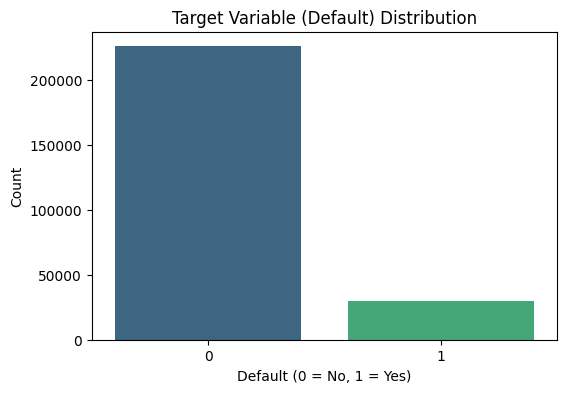

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=data, palette='viridis')
plt.title('Target Variable (Default) Distribution')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


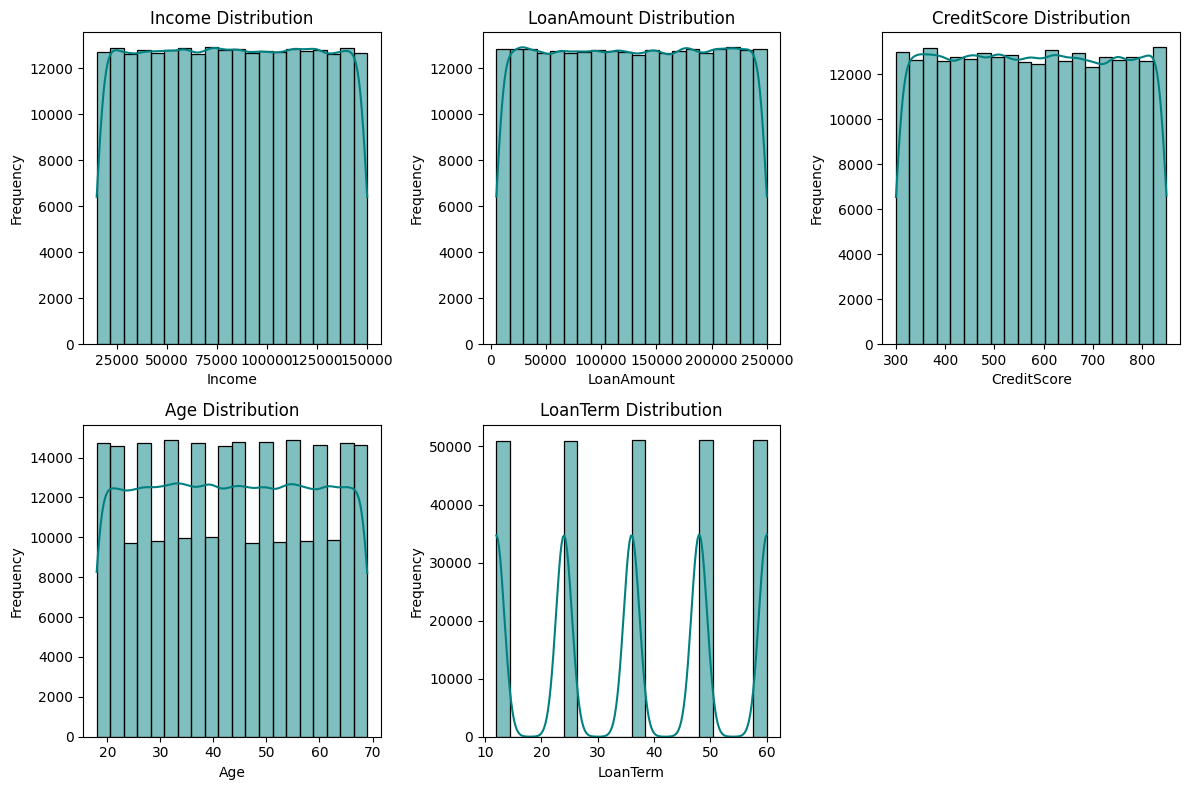

In [15]:

num_features = ['Income', 'LoanAmount', 'CreditScore', 'Age', 'LoanTerm']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=20, kde=True, color='teal')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-16-99596591f007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
<ipython-input-16-99596591f007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
<ipython-input-16-99596591f007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
<ipython-input-16-99596591f007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

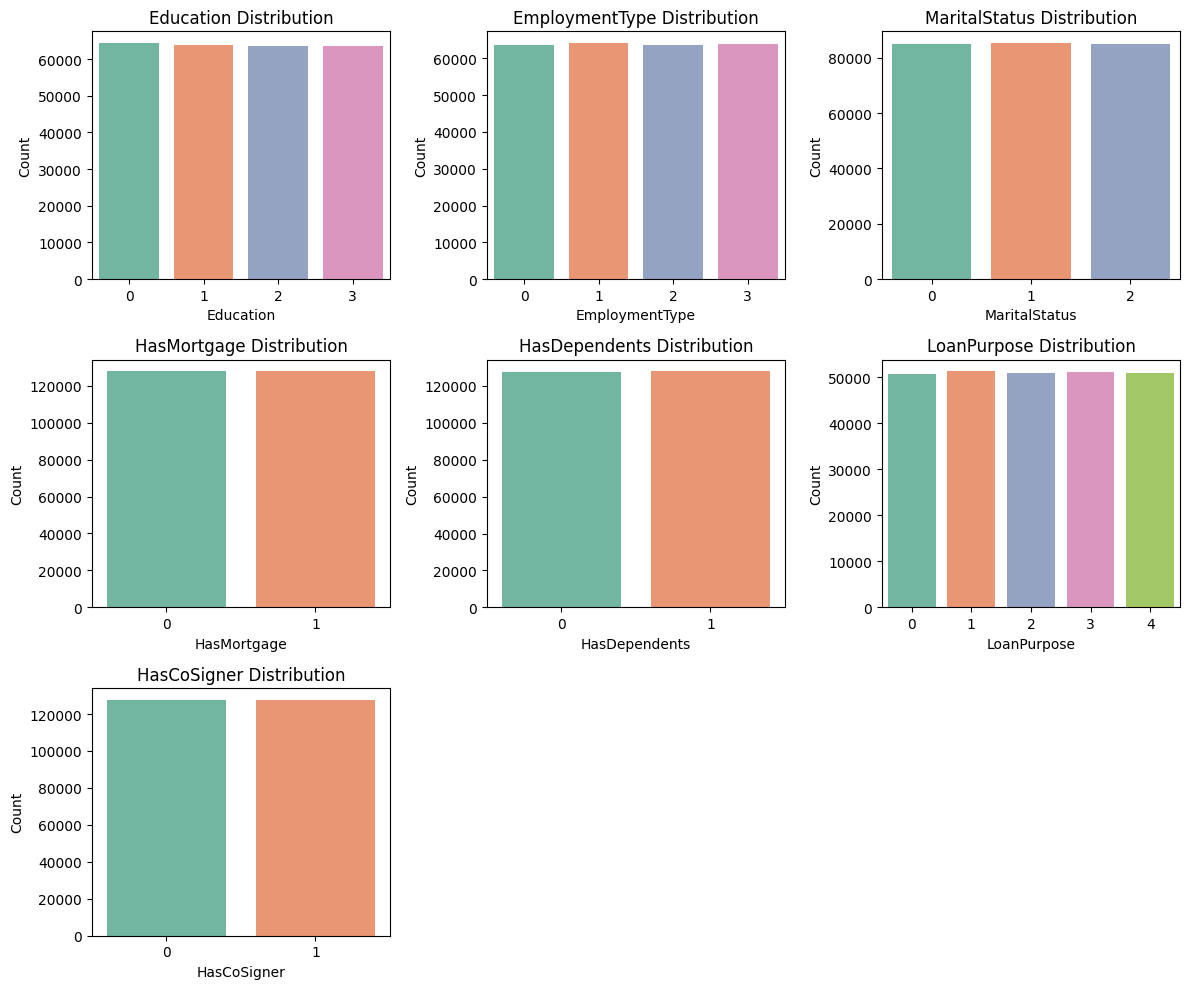

In [16]:

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [18]:
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


income_outliers = find_outliers_IQR(data, 'Income')
loan_amount_outliers = find_outliers_IQR(data, 'LoanAmount')

print("Income Outliers:\n", income_outliers)
print("\nLoan Amount Outliers:\n", loan_amount_outliers)

Income Outliers:
 Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default, Income_to_LoanRatio, CreditScore_to_Age, LoanTerm_in_Years, Age_Income_Interaction, Income_LoanAmount_Interaction]
Index: []

[0 rows x 23 columns]

Loan Amount Outliers:
 Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default, Income_to_LoanRatio, CreditScore_to_Age, LoanTerm_in_Years, Age_Income_Interaction, Income_LoanAmount_Interaction]
Index: []

[0 rows x 23 columns]


<ipython-input-21-992ddbb8b643>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='Income', data=data, palette='pastel', showfliers=True) #showfliers=True to show outlier points.
<ipython-input-21-992ddbb8b643>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='LoanAmount', data=data, palette='pastel', showfliers=True) #showfliers=True to show outlier points.


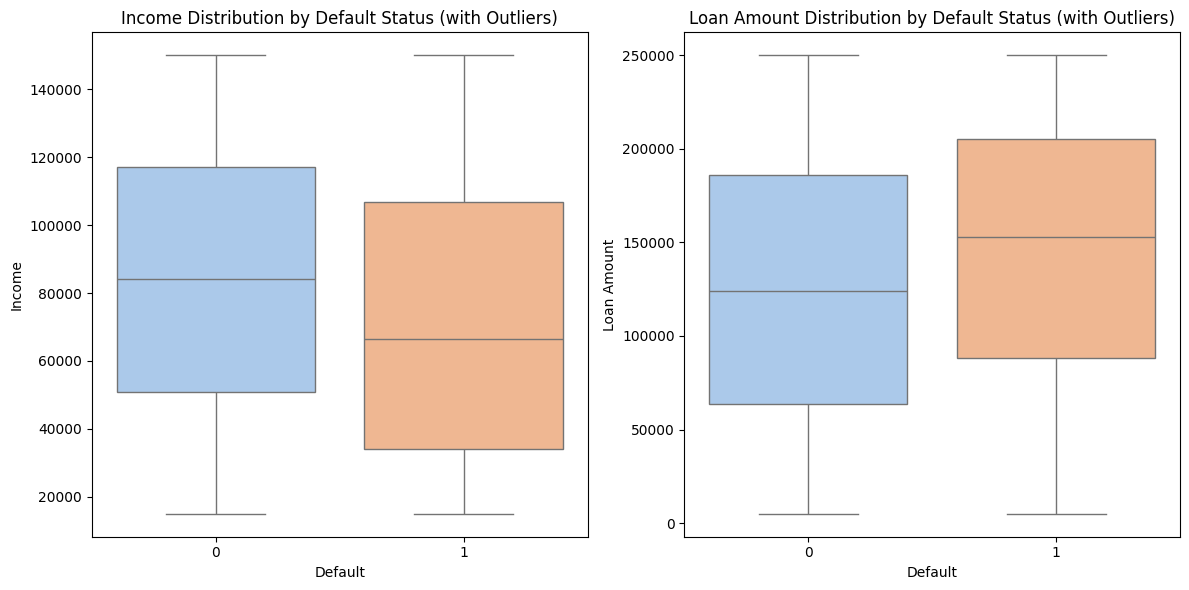

In [21]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Default', y='Income', data=data, palette='pastel', showfliers=True) #showfliers=True to show outlier points.
plt.title('Income Distribution by Default Status (with Outliers)')
plt.xlabel('Default')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(x='Default', y='LoanAmount', data=data, palette='pastel', showfliers=True) #showfliers=True to show outlier points.
plt.title('Loan Amount Distribution by Default Status (with Outliers)')
plt.xlabel('Default')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

